# KMeans

In [ ]:
#http://minerandodados.com.br/index.php/2018/02/02/algoritmo-k-means-python-passo-passo/
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#silhueta:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
#http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

#k-medoid x k-means: http://www.math.le.ac.uk/people/ag153/homepage/KmeansKmedoids/Kmeans_Kmedoids.html

##### k-medoid x k-means: It could be more robust to noise and outliers as compared to k-means because it minimizes a sum of general pairwise dissimilarities instead of a sum of squared Euclidean distances. The possible choice of the dissimilarity function is very rich but in our applet we used the Euclidean distance.

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [72]:
iris_aux = datasets.load_iris()
iris = pd.DataFrame(iris_aux.data, columns=iris_aux.feature_names)
iris['target'] = pd.Series(iris_aux.target)
iris['species'] = pd.Categorical.from_codes(iris_aux.target, iris_aux.target_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [76]:
 kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
          verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
#nao precisa da variavel resposta em kmeans
X = iris.iloc[:,:4]
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## centroides

In [77]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [78]:
#tabela de distancias
distance = kmeans.fit_transform(X)
distance

array([[3.41925061, 0.14694217, 5.0595416 ],
       [3.39857426, 0.43816892, 5.11494335],
       [3.56935666, 0.41230086, 5.27935534],
       [3.42240962, 0.51883716, 5.15358977],
       [3.46726403, 0.19796969, 5.10433388],
       [3.14673162, 0.68380699, 4.68148797],
       [3.51650264, 0.41520116, 5.21147652],
       [3.33654987, 0.0599333 , 5.00252706],
       [3.57233779, 0.80099438, 5.32798107],
       [3.3583767 , 0.36659514, 5.06790865],
       [3.32449131, 0.48784424, 4.89806763],
       [3.31126872, 0.25138019, 4.9966845 ],
       [3.46661272, 0.49192682, 5.19103612],
       [3.90578362, 0.90906105, 5.65173594],
       [3.646649  , 1.02019214, 5.10804455],
       [3.49427881, 1.21309192, 4.88564095],
       [3.495248  , 0.66241377, 5.03090587],
       [3.38444981, 0.1509702 , 5.02342022],
       [3.11245944, 0.82848778, 4.61792995],
       [3.37738931, 0.39898872, 4.97213426],
       [3.07471224, 0.46172719, 4.6955761 ],
       [3.31506588, 0.33762701, 4.9236821 ],
       [3.

In [79]:
#variavel resposta atribuida
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## fixando centroides iniciais

In [80]:
 kmeans2 = KMeans(n_clusters=3, init= np.array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]), n_init=1, max_iter=300, tol=0.0001, precompute_distances='auto', 
          verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
#nao precisa da variavel resposta em kmeans
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True,
    init=array([[5.006  , 3.418  , 1.464  , 0.244  ],
       [6.85   , 3.07368, 5.74211, 2.07105],
       [5.90161, 2.74839, 4.39355, 1.43387]]),
    max_iter=300, n_clusters=3, n_init=1, n_jobs=1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

# gráfico do cotovelo: achar k

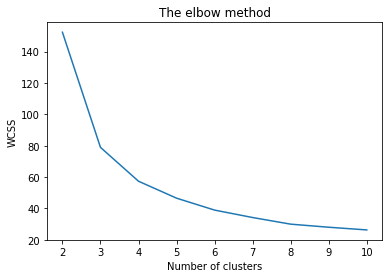

In [85]:
#vetor com a soma das distâncias intra-cluster
wcss = []

for i in range(2, 11):
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    #init = 'k-means++' : selects initial cluster centers for k-mean
    #clustering in a smart way to speed up convergence.
    
    #init = 'random': choose k observations (rows) at random from data for
    #the initial centroids
       
    kmeans3 = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', 
          verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
    kmeans3.fit(X)
    wcss.append(kmeans3.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

 #inertia_ que corresponde ao somatório dos erros quadráticos das instâncias de cada cluster.

In [86]:
#classificar novos dados nos clusters
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([1, 2, 0])

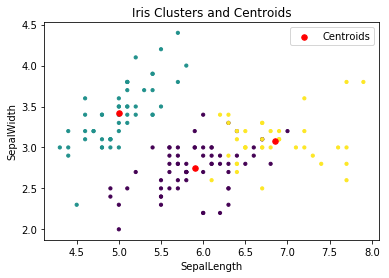

In [103]:
#X = iris.iloc[:,:4]
plt.scatter(X.iloc[:, 0], X.iloc[:,1], s = 10, c = kmeans.labels_, label = '')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'red',label = 'Centroids')
plt.title('Iris Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()
 
plt.show()

## Silhueta

In [96]:
from plotly import plotly as py
from plotly import graph_objs as go
from plotly import tools

ModuleNotFoundError: No module named 'plotly'

In [99]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6808136202713507


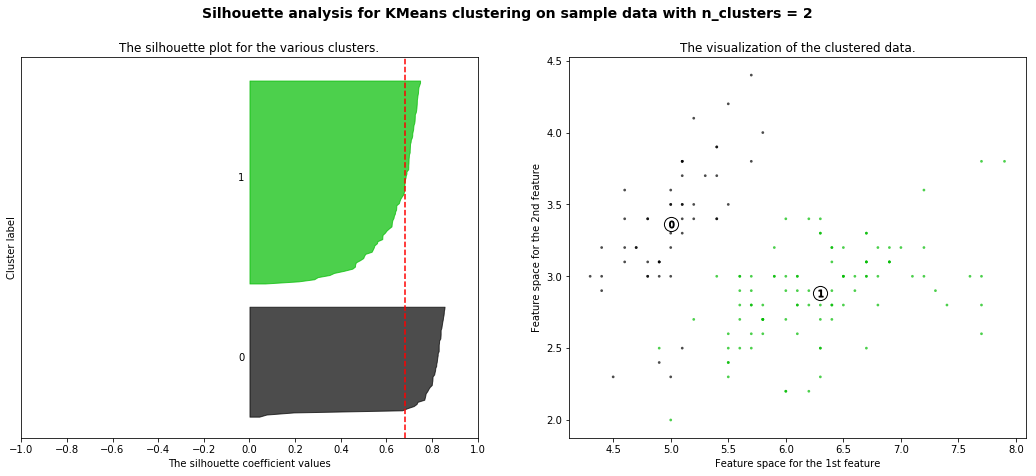

For n_clusters = 3 The average silhouette_score is : 0.5525919445213676


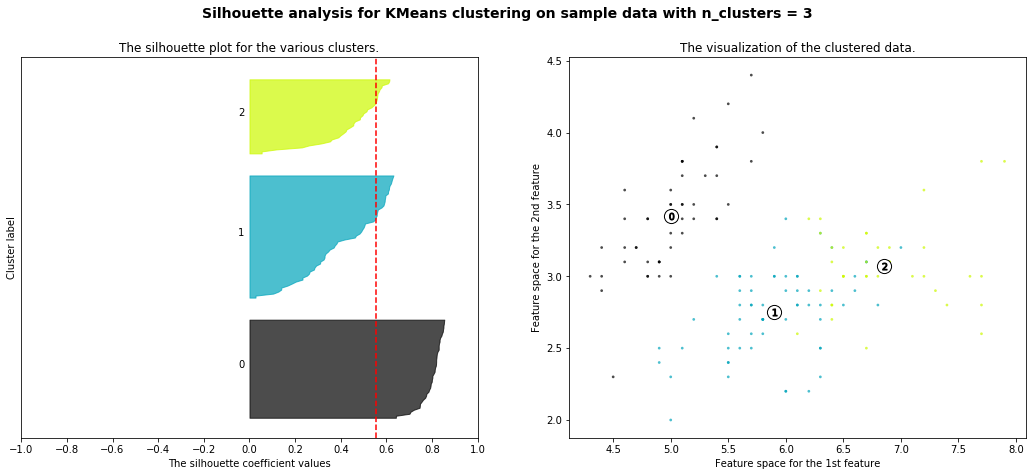

For n_clusters = 4 The average silhouette_score is : 0.49782569007544936


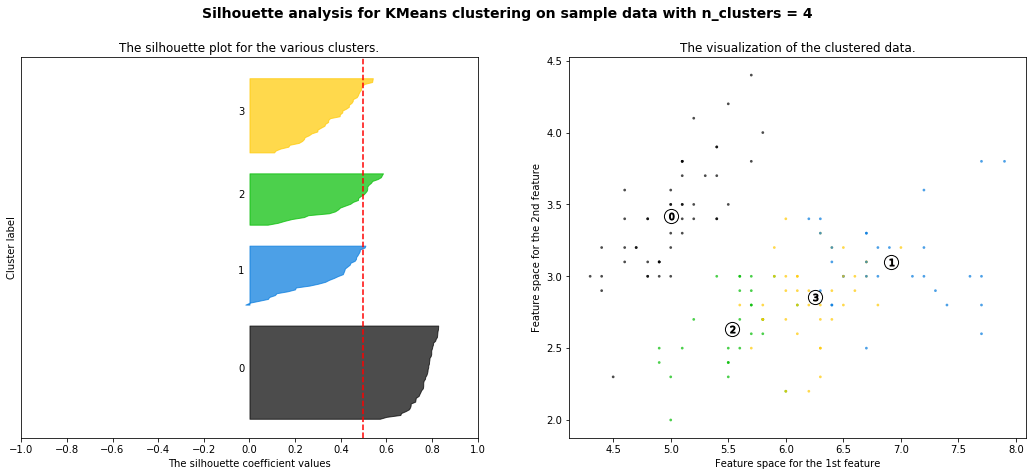

For n_clusters = 5 The average silhouette_score is : 0.48851755085386317


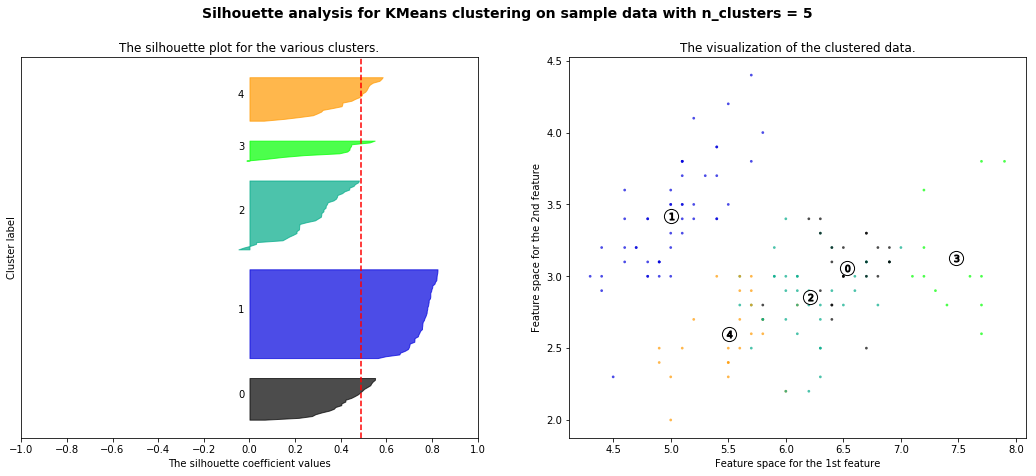

For n_clusters = 6 The average silhouette_score is : 0.37121805025641585


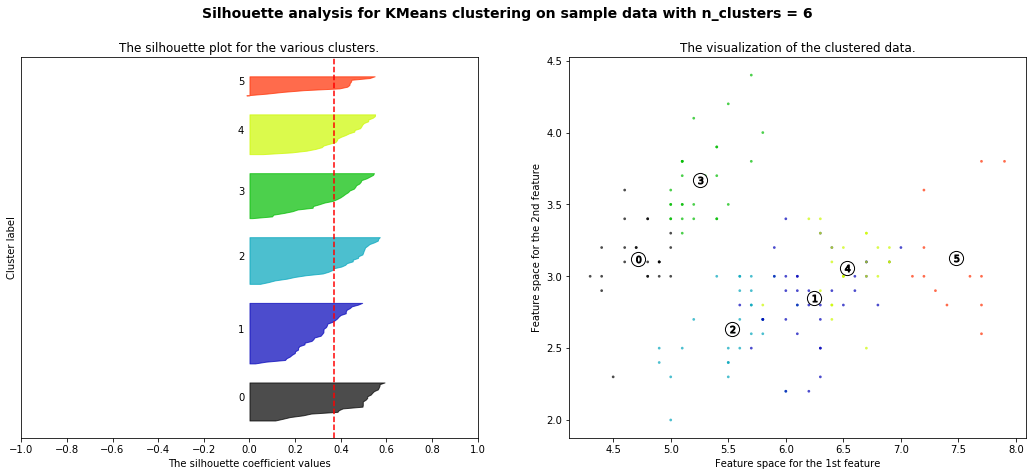

In [123]:
print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    ##clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, 
                       tol=0.0001, precompute_distances='auto', 
          verbose=0, random_state=10, copy_x=True, n_jobs=1, algorithm='auto')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
        # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

    plt.show()


    

In [46]:
y_kmeans = kmeans.fit_predict(iris.iloc[:,:4])
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])